In [3]:
import pandas as pd
import sklearn as sk

In [5]:
import pandas as pd

# Load the dataset with proper encoding
data = pd.read_csv("British Airways ML.csv", encoding='latin1')

# Display first few rows
print(data.head())

# Basic statistics of the dataset
print(data.describe())

# Information about columns
print(data.info())


   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values (if any)
data_cleaned = data.dropna()

# Encode categorical variables using LabelEncoder
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = data_cleaned.drop(columns=['booking_complete'])
y = data_cleaned['booking_complete']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Training set shape: (40000, 13), Testing set shape: (10000, 13)


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)



In [8]:
from sklearn.metrics import accuracy_score, precision_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}")


Accuracy: 0.8562, Precision: 0.5719


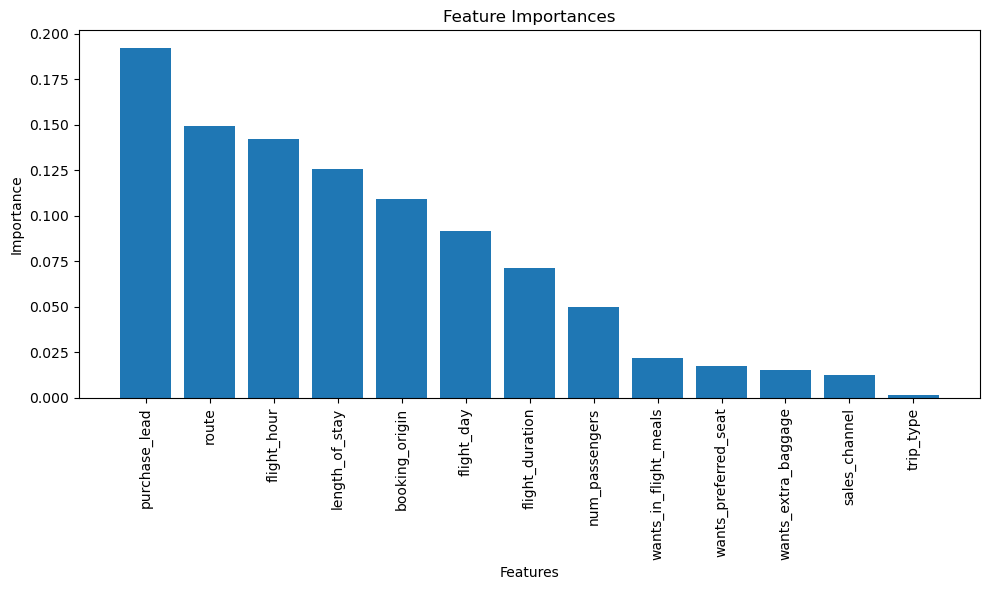

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
columns_sorted = X_train.columns[indices]
importances_sorted = feature_importances[indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances_sorted, align="center")
plt.xticks(range(X_train.shape[1]), columns_sorted, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
